In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
import pathlib
import numpy as np
import matplotlib.pyplot as plt

## Data exploration

In [2]:
labels = {
    0: 'badminton',
    1: 'baseball',
    2: 'basketball',
    3: 'boxing',
    4: 'chess',
    5: 'cricket',
    6: 'fencing',
    7: 'football',
    8: 'formula1',
    9: 'gymnastics',
    10: 'hockey',
    11: 'ice_hockey',
    12: 'kabaddi',
    13: 'motogp',
    14: 'shooting',
    15: 'swimming',
    16: 'table_tennis',
    17: 'tennis',
    18: 'volleyball',
    19: 'weight_lifting',
    20: 'wrestling',
    21: 'wwe'
}

Important to replicate the same data folder structure, as it won't be uploaded to git

In [3]:
DATA_DIR = 'input/data/'
DATA_CSV = 'input/data.csv' 

In [4]:
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))

                             image_path  target
0    input/data/gymnastics/00000774.jpg     9.0
1  input/data/table_tennis/00000702.jpg    16.0
2       input/data/fencing/00000275.jpg     6.0
3      input/data/baseball/00000380.jpg     1.0
4       input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


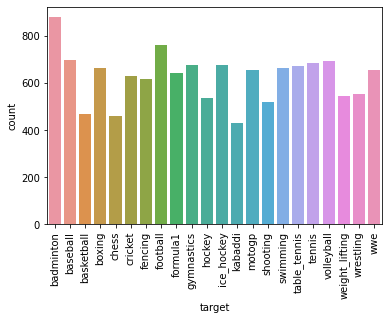

In [5]:
ax = sns.countplot(
    df['target'],
    
)
ax.set_xticklabels(labels.values(), rotation=90);

### Creating dataets

In [6]:
train_df, val_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])


In [7]:
train_df.shape, val_df.shape, test_df.shape

((11040, 2), (1380, 2), (1380, 2))

In [8]:
train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [9]:
print(train_df.head(5))


   index                            image_path  target
0   1499  input/data/table_tennis/00000433.jpg    16.0
1  10640  input/data/table_tennis/00000406.jpg    16.0
2   6676        input/data/boxing/00000453.jpg     3.0
3  13562      input/data/shooting/00000413.jpg    14.0
4   9271    input/data/basketball/00000434.JPG     2.0


In [10]:
print(train_df["image_path"][0])


input/data/table_tennis/00000433.jpg


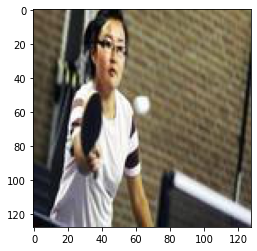

In [11]:
img = Image.open(train_df["image_path"][0])
plt.imshow(img)

### Image resizing

In [13]:
for path in train_df["image_path"]:
    img = Image.open(path) 
    new_width  = 128
    new_height = 128
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(path) 

In [21]:
train_df_images = []
for path in train_df["image_path"]:
    image = tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
    )
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    input_arr.reshape(128, 128, 3)
    train_df_images.append(input_arr.tolist())


ValueError: cannot reshape array of size 499500 into shape (274,500,3)